In [74]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import linalg as la

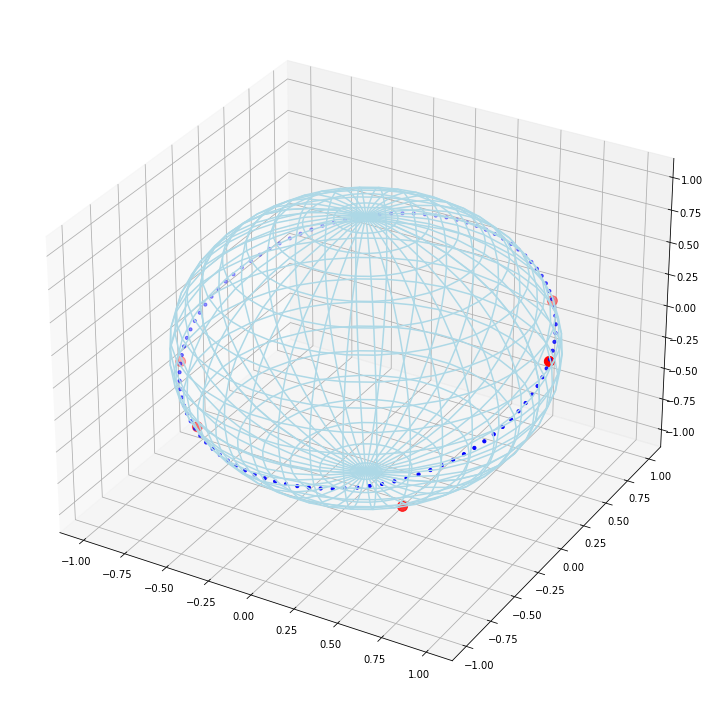

Point 1 and Point 2 are on great circle so just need to make sure that at least 
 2 of the 3 remaining points are either both above or both below the plane that
 the great circle creates -> pigeonhole principle
Point 2 below [0.7122338873408632, 0.6783307283776705, 0.1805278722578362]
Point 3 below [-0.6418131201457443, -0.602925500976427, -0.4738742017467387]
Point 4 below [0.45186834191667524, -0.4118282303102148, -0.7913359023152123]


In [258]:
phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(5)

points=[]
for i in range(0,len(xi)):
    points.append([xi[i],yi[i],zi[i]])

u=points[0]
u_array=np.array(u)
w=np.cross(points[0],points[1])
v=(np.cross(u,w))/(la.norm(w))
u_array,w,v


omega_list=np.linspace(0,2*np.pi,100)
x_gc=[]
y_gc=[]
z_gc=[]
for i in range(0,len(omega_list)):
    c=u_array*np.sin(omega_list[i])+v*np.cos(omega_list[i])
    x_gc.append(c[0])
    y_gc.append(c[1])
    z_gc.append(c[2])
    
fig, ax = plt.subplots(1, 1,figsize=(10, 10), subplot_kw={'projection':'3d', 'aspect':'auto'})
ax.plot_wireframe(x, y, z, color='lightblue', rstride=1, cstride=1)
ax.scatter(xi, yi, zi, s=100, c='r', zorder=10)
ax.scatter(x_gc, y_gc, z_gc, s=10, c='b', zorder=10)

plt.show()

gc_points=[]
for i in range(0,len(x_gc)):
    gc_points.append([x_gc[i],y_gc[i],z_gc[i]])


p1=np.array(gc_points[0])
p2=np.array(gc_points[20])
p3=np.array(gc_points[50])


v1 = p3 - p1
v2 = p2 - p1

# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp

# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)

print('Point 1 and Point 2 are on great circle so just need to make sure that at least \n 2 of the 3 remaining points are either both above or both below the plane that\n the great circle creates -> pigeonhole principle')
for i in range(2, len(points)):
    val = points[i][0]*a+points[i][1]*b+points[i][2]*c
    if val<d:
        print('Point',i,'above',points[i])
    else:
        print('Point', i,'below',points[i])
